In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoderw
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r"C:\Users\aakar\OneDrive\Desktop\Data Science\Deep Learning\Datasets\breast_cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(columns="Unnamed: 32",axis=1,inplace=True)
data.drop(columns="id",axis=1,inplace=True)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.shape

(569, 31)

In [7]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### B = Balign (Type of Cancer that doesn't spread to different body parts)
### M = Malignant (Type of Cancer that can spread to different body parts)

In [8]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### When Mean > Median(50%) it is Positively Skewed

### When Mean < Median(50%) it is Negatively Skewed

So we may have to transform dataset when using Regressing model

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Diagnosis is a Categorical Column 
### Other columns have continuous values

In [11]:
## Encoding the Target Column
label_encode=LabelEncoder()
labels= label_encode.fit_transform(data["diagnosis"])
data["target"]=labels
data.drop(columns="diagnosis",axis=1,inplace=True)

In [12]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [15]:
data["target"].value_counts()

0    357
1    212
Name: target, dtype: int64

### Balign => 0
### Malignant => 1
### Number of Balign cases are more than Malignant cases in dataset

In [17]:
X=data.drop(columns="target",axis=1)
Y=data["target"]

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)

## Use Standars Scaler to increase the accuracy of model after splitting dataset

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) # First fit then transforms train data
X_test_std = scaler.transform(X_test) #Transfrom test data

In [36]:
print(X_train_std)

[[ 1.70581999  1.04974466  2.12129465 ...  2.04939907  3.94428119
   0.86655367]
 [ 0.53638811 -0.90994477  0.5690952  ...  1.25584994  0.16797759
   0.40524244]
 [-0.13145612 -0.99333581 -0.14884823 ... -0.14001353  0.74198821
   0.68752098]
 ...
 [-0.31743806  1.31844912 -0.38065427 ... -0.835536   -0.944168
  -1.15058462]
 [ 0.02071092  0.25289695  0.02070601 ...  0.28913543 -0.58853098
  -0.2900195 ]
 [ 1.59592158  1.3161327   1.57659141 ...  0.88090926  0.61408367
   0.04333279]]


# Build Neural Network
Input Layer ==> Hidden Layer ==> Outpur Layer

In [19]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [37]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # Input Layer
    keras.layers.Dense(41,activation='relu'), # Hidden Layer (No. of Neurons upto user)
    keras.layers.Dense(2,activation='sigmoid') # Output Layer ((No. of Neurons = No. of Classes)eg-:Here 2 classes are B and M))
])

#keras.layers.dense( <No. of neurons> ,activation ='<Activation Function Name>')
#keras.layers.Flatten(input_shape=(<Number of columns excluding target column>,))

# Flatten-: As the input is in Multi dimension we need it to convert to 1 Dimensional.
# Dense-: All the current neurons will get input from all the previous neurons.

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### loss = 'sparase_categorical_crossentropy' (target variable has 0,1,2,etc)
Example-:
eagle => 0
owl => 1
sparrow => 2

#### loss = 'categorical_crossentropy' (target variable has one hot encoding)
Example-:
eagle => [1 0 0]
owl => [0 1 0]
sparrow => [0 0 1]

In [39]:
history=model.fit(X_train_std,Y_train,validation_split=0.1, epochs=15)

Epoch 1/15
12/12 [==============================] - 1s 15ms/step - loss: 0.5145 - accuracy: 0.7318 - val_loss: 0.4438 - val_accuracy: 0.8000
Epoch 2/15
12/12 [==============================] - 0s 4ms/step - loss: 0.3220 - accuracy: 0.9022 - val_loss: 0.2871 - val_accuracy: 0.9250
Epoch 3/15
12/12 [==============================] - 0s 6ms/step - loss: 0.2277 - accuracy: 0.9413 - val_loss: 0.2144 - val_accuracy: 0.9250
Epoch 4/15
12/12 [==============================] - 0s 9ms/step - loss: 0.1767 - accuracy: 0.9581 - val_loss: 0.1749 - val_accuracy: 0.9500
Epoch 5/15
12/12 [==============================] - 0s 8ms/step - loss: 0.1468 - accuracy: 0.9637 - val_loss: 0.1544 - val_accuracy: 0.9500
Epoch 6/15
12/12 [==============================] - 0s 7ms/step - loss: 0.1259 - accuracy: 0.9665 - val_loss: 0.1420 - val_accuracy: 0.9500
Epoch 7/15
12/12 [==============================] - 0s 7ms/step - loss: 0.1138 - accuracy: 0.9693 - val_loss: 0.1347 - val_accuracy: 0.9250
Epoch 8/15
12/12 [=

### Before Standard Scaler => 90%
### After Standard Scaler => 98.6%

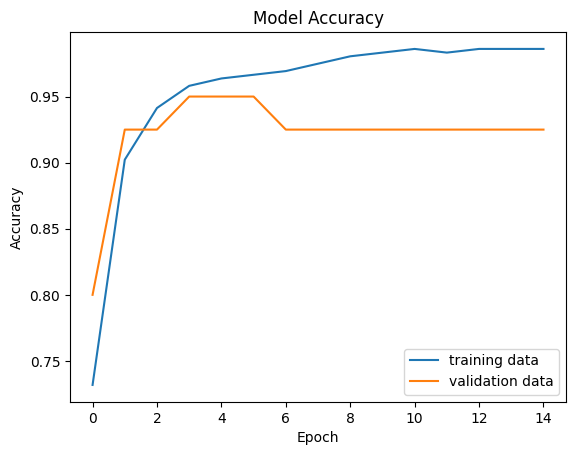

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training data','validation data'],loc='lower right')

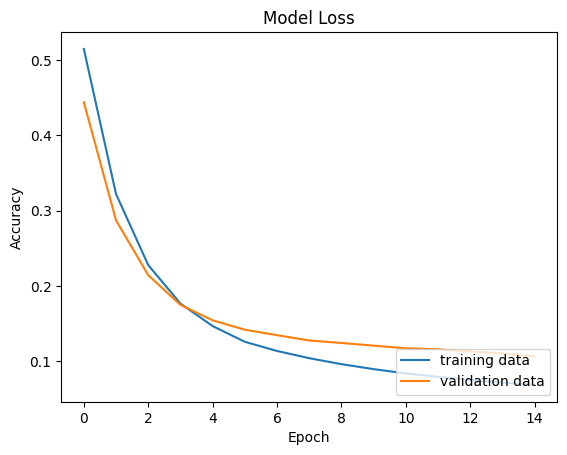

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training data','validation data'],loc='lower right')

In [44]:
# Accuracy on Test Model
loss,accuracy=model.evaluate(X_test_std,Y_test)
print(accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9883
0.988304078578949


In [45]:
# model.predict() gives the prediction probability of each class for that data point
Y_pred=model.predict(X_test_std)

6/6 [==============================] - 0s 2ms/step


In [47]:
# Convert the prediction probability to class labels
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


# Predictive System

In [52]:
input_data=(20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902)

# Changing the input data to a numpy array
input_data_as_array = np.asarray(input_data)

# reshape the numpy array 
input_data_reshaped = input_data_as_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)
prediction_label = [np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0] == 0):
    print("The Tumor is Balign")
else:
    print("The Tumor is Malignant")

1/1 [==============================] - 0s 20ms/step
[[0.01864408 0.97687894]]
[1]
The Tumor is Malignant


C:\Coding\Anaconda\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
